# Algorithme d'Euclide pour les entiers

In [1]:
mod(15,2),mod(16,2) #renvoie 15 et 16 modulo 2

(1, 0)

In [2]:
15%2, 16%2 #idem

(1, 0)

In [3]:
type(mod(15,2)),type(15%2) #la différence est dans le type de la réponse

(<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>,
 <class 'sage.rings.integer.Integer'>)

In [4]:
53%22,mod(53,22)

(9, 9)

In [5]:
53//22,53-22*(53//22) #53//22 renvoie le quotient de la division euclidienne de 53 par 22

(2, 9)

In [6]:
gcd(15132,103196) #pgcd classique

4

In [7]:
d,u,v=xgcd(15132,103196) #donne le pgcd d et deux entiers u et v tels que 15132u+103196v=d
d,u,v,15132*u+103196*v

(4, 11689, -1714, 4)

In [8]:
factor(15132),factor(103196)

(2^2 * 3 * 13 * 97, 2^2 * 25799)

## Euclide originel

In [21]:
def euclide_originel_iteratif(a,b):
    n=0 #compteur du nombre d'étapes
    while b!=0:
        r=max(a,b)-min(a,b)
        a=min(a,b)
        b=r
        n=n+1
    return (a,n)

In [22]:
euclide_originel_iteratif(12,4)

(4, 3)

In [23]:
def euclide_originel_recursif(a,b):
    if min(a,b)==0:
        return max(a,b)
    else:
        return euclide_originel_recursif(min(a,b),max(a,b)-min(a,b)) 

In [26]:
euclide_originel_recursif(13,6)

1

## Euclide du cours

In [15]:
def euclide(a,b):
    n=0
    while b!=0:
        n=n+1
        r=a%b
        a=b
        b=r
    return (a,n)

In [28]:
euclide(12,4)

(4, 1)

In [29]:
def euclide_recursif(a,b):
    if b==0:
        return a
    else:
        return euclide_originel_recursif(b,a%b) 

In [32]:
euclide_recursif(5,12)

1

In [34]:
def fibonacci(n): #fibonacci itératif
    a=0
    b=1
    for i in range(n):
        c=a
        a=b
        b=b+c
    return a

In [38]:
print([euclide(fibonacci(n+2),fibonacci(n+1))[1] for n in range(1,101)]) #on constate qu'il semblerait que le nombre d'étapes pour pgcd(F_{n+1},F_{n+1}) soit égal à n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


## Euclide étendu

In [13]:
def euclide_etendu(a,b):
    M=matrix(2,2,[1,0,0,1])
    while b!=0:
        r=a%b
        q=a//b
        a=b
        b=r
        M=matrix(2,2,[0,1,1,-q])*M
    return a,M[0,0],M[0,1]

In [44]:
euclide_etendu(15,6)

(3, 1, -2)

In [13]:

x^8%(x^2+2)

TypeError: unsupported operand parent(s) for %: 'Symbolic Ring' and 'Symbolic Ring'

In [45]:
1*15-2*6

3

In [46]:
def inverse(a,n):
    E=euclide_etendu(a,n)
    if E[0]!=1:
        return("Les entiers a et n ne sont pas premiers entre eux")
    return E[1]%n

In [47]:
inverse(2,17)

9

In [48]:
(2*9)%17

1

In [2]:
L=[1,2,3]
P=[2,3,4]

In [7]:
[i*j for i,j in zip(L,P)]

[2, 6, 12]

In [49]:
inverse(2,18)

'Les entiers a et n ne sont pas premiers entre eux'

In [50]:
def chinois2(a,b,m,n):
    E=euclide_etendu(m,n)
    if E[0]!=1:
        return("Les entiers m et n ne sont pas premiers entre eux")
    return (E[2]*n*a+E[1]*m*b)%(m*n)

In [52]:
chinois2(1,4,3,7)

4

In [71]:
def chinois(a,n):
    if len(n)==1:
        return a[0]%n[0] #si la liste est de taille 1, c'est facile, on renvoie a modulo n
    r = chinois2(a[0],a[1],n[0],n[1])
    if (len(n)==2) or (r=="Les entiers m et n ne sont pas premiers entre eux"): #idem si la liste est de taille 2, on utilise chinois2
        return r
    m=[n[0]*n[1]]+[n[i] for i in range(2,len(n))]
    b=[r]+[a[i] for i in range(2,len(n))]
    return chinois(b,m)

In [72]:
chinois([4,3,2,1],[4,5,7,17])

2228

In [69]:
2228%4,2228%5,2228%7,2228%17

(0, 3, 2, 1)

In [73]:
chinois([0,3,2,1],[4,10,7,17])

'Les entiers m et n ne sont pas premiers entre eux'

## Euclide étendu pour plus de deux entiers

In [193]:
def euclide_etendu2(a):
    n=len(a)
    if n==1:
        return [a[0],1]
    L=[]
    d,u,v=euclide_etendu(a[0],a[1])
    L.append(u)
    L.append(v)
    for i in range(2,n):
        d,u,v=euclide_etendu(d,a[i])
        for j in range(i):
            L[j]=u*L[j]
        L.append(v)
    return(L)

In [198]:
euclide_etendu2([4,6,18,3])

[1, -1, 0, 1]

In [199]:
4-6+3

1

## Résolution de systèmes linéaires de congruences

In [10]:
def syst_lin_cong(a,b,n,m): #cas n=2 pour résoudre a congru à n et b congru à m
    d,u,v=euclide_etendu(n,m)
    if (a-b)%d!=0:
        return("Le système n'a pas de solutions!")
    p=(n*m)//d
    return (b*u*(n//d)+a*v*(m//d))%p

In [111]:
syst_lin_cong(1,5,4,6)

5

In [19]:
def syst(a,n): # cas général récursivement
    if len(n)==1:
        return a[0]%n[0] #si la liste est de taille 1, c'est facile, on renvoie a modulo n
    r = syst_lin_cong(a[0],a[1],n[0],n[1])
    if (len(n)==2) or (r=="Le système n'a pas de solutions!"): #idem si la liste est de taille 2, on utilise chinois2
        return r
    d=euclide(n[0],n[1])[0]
    p=(n[0]*n[1])//d
    print(p,r)
    m=[p]+[n[i] for i in range(2,len(n))]
    b=[r]+[a[i] for i in range(2,len(n))]
    print(m,b)
    return syst(b,m)

In [122]:
syst([1,2,12,7],[3,2,4,5])

52

In [20]:
syst([3,5,39],[12,34,51])

204 39
[204, 51] [39, 39]


39

In [128]:
52%3,52%2,52%4,52%5

(1, 0, 0, 2)

In [206]:
syst([1,2,13,7],[3,2,4,5])

"Le système n'a pas de solutions!"

In [150]:
def euclide_n(a): #fournit le pgcd de n entiers
    n=len(a)
    if n==1:
        return a
    d=euclide(a[0],a[1])[0]
    if n==2:
        return d
    a=[d]+[a[i] for i in range(2,n)]
    return(euclide_n(a))

In [153]:
euclide_n([6,27,12])

3

In [154]:
def ppcm(a,b): #donne le ppcm
    d=euclide(a,b)[0]
    return((a*b)//d)

In [156]:
ppcm(12,4),ppcm(2,3)

(12, 6)

In [161]:
ppcm(0,2)

0

In [157]:
def ppcm_n(a): # donne le ppcm de n entiers
    n=len(a)
    if n==1:
        return a
    m=ppcm(a[0],a[1])
    if n==2:
        return m
    return(ppcm_n([m]+[a[i] for i in range(2,n)]))

In [160]:
ppcm_n([2,3,10,7]),2*3*5*7

(210, 210)

In [217]:
def syst2(a,n): #résolution générale de a_i congru à n_i en utilisant la deuxième solution du corrigé
    cond=True
    for i in range(len(n)-1):
        for j in range(i+1,len(n)):
            cond=cond and ((a[i]-a[j])%euclide(n[i],n[j])[0])==0
    if cond==False:
        return("Le système n'a pas de solutions!")
    p=prod(x for x in n)
    if p==0:
        return("Erreur")
    if len(n)==1:
        return a[0]%n[0] #si la liste est de taille 1, c'est facile, on renvoie a modulo n
    r=euclide_n(n)
    M=ppcm_n(n)
    L=[M//x for x in n]
    u=euclide_etendu2(L)
    return sum(a[i]*u[i]*L[i] for i in range(len(n)))%M

In [218]:
syst2([1,2,13,7],[3,2,4,5])

"Le système n'a pas de solutions!"

In [219]:
syst2([1,2,12,7],[3,2,4,5])

52

# Algorithme d'Eculide pour les polynômes

In [14]:
R.<x>=QQ[] #permet de travailler dans l'anneau de polynômes Q[x]
P=-x^8+x^7+x^5-x^3-x+1
Q=x^7-x^6-x+1

In [221]:
factor(gcd(P,Q)) #tout marche alors comme pour les entiers

(x + 1) * (x - 1)^2 * (x^2 + x + 1)

x^6 - 2*x^4 + 4*x^2 - 8

In [222]:
d,u,v=xgcd(P,Q) 
d,u,v,P*u+Q*v

(x^5 - x^3 - x^2 + 1, 1, x, x^5 - x^3 - x^2 + 1)

In [223]:
euclide(P,Q)

(x^5 - x^3 - x^2 + 1, 2)

In [224]:
euclide(x^2+x,x^3+x) #fonctionne mais pas toujours unitaire

(2*x, 3)

In [232]:
def euclide_etendu_poly(a,b): #on force la sortie à être unitaire ici
    M=matrix(2,2,[1,0,0,1])
    while b!=0:
        r=a%b
        q=a//b
        a=b
        b=r
        M=matrix(2,2,[0,1,1,-q])*M
    c=list(a)[a.degree()]
    return a/c,M[0,0]/c,M[0,1]/c

In [239]:
euclide_etendu_poly(P,Q)

(x^5 - x^3 - x^2 + 1, 1, x)

In [240]:
euclide_etendu_poly(x^2+x,x^3+x)

(x, -1/2*x + 1/2, 1/2)

In [241]:
(-1/2*x + 1/2)*(x^2+x)+1/2*(x^3+x)

x

In [242]:
euclide_etendu(x^2+x,x^3+x)

(2*x, -x + 1, 1)

In [244]:
P=x^8+x^6-3*x^4-3*x^3+8*x^2+2*x-5
Q=3*x^6+5*x^4-4*x^2-9*x+21

In [245]:
def euclide_etendu_poly2(a,b): #euclide en faisant afficher les restes
    M=matrix(2,2,[1,0,0,1])
    while b!=0:
        r=a%b
        q=a//b
        a=b
        b=r
        M=matrix(2,2,[0,1,1,-q])*M
        print(a)
    c=list(a)[a.degree()]
    return a/c,M[0,0]/c,M[0,1]/c

In [246]:
euclide_etendu_poly2(P,Q)

3*x^6 + 5*x^4 - 4*x^2 - 9*x + 21
-5/9*x^4 + 1/9*x^2 - 1/3
-117/25*x^2 - 9*x + 441/25
233150/19773*x - 102500/6591
-1288744821/543589225


(1,
 13989/130354*x^5 + 9225/65177*x^4 + 20281/65177*x^3 + 67125/130354*x^2 + 5149/130354*x - 1391/18622,
 -4663/130354*x^7 - 3075/65177*x^6 - 5206/65177*x^5 - 18275/130354*x^4 + 4944/65177*x^3 + 21579/130354*x^2 + 1910/65177*x + 3889/130354)

In [248]:
euclide_etendu(P,Q)

(-1288744821/543589225,
 -59319/233150*x^5 - 7296237/21743569*x^4 - 401016213/543589225*x^3 - 53090505/43487138*x^2 - 101811177/1087178450*x + 192529701/1087178450,
 19773/233150*x^7 + 2432079/21743569*x^6 + 102938238/543589225*x^5 + 14454063/43487138*x^4 - 97757712/543589225*x^3 - 426681567/1087178450*x^2 - 7553286/108717845*x - 76897197/1087178450)

In [255]:
def euclide_etendu_poly3(a,b): #on supprime les dénominateurs
    M=matrix(2,2,[1,0,0,1])
    while b!=0:
        r=((list(b)[b.degree()])^(a.degree()-b.degree()+1)*a)%b
        q=a//b
        a=b
        b=r
        M=matrix(2,2,[0,1,1,-q])*M
        print(a)
    return a,M[0,0],M[0,1]

In [256]:
euclide_etendu_poly3(P,Q)

3*x^6 + 5*x^4 - 4*x^2 - 9*x + 21
-15*x^4 + 3*x^2 - 9
15795*x^2 + 30375*x - 59535
1254542875143750*x - 1654608338437500
12593338795500743100931141992187500


(12593338795500743100931141992187500,
 -1/418180958381250*x^5 - 41/12999852059545125*x^4 - 20281/2924966713397653125*x^3 + 171364049848870519037/856820249244619188750*x^2 - 1841976421/146248335669882656250*x + 1599397798414640260799/4284101246223095943750,
 1/1254542875143750*x^7 + 41/38999556178635375*x^6 + 5206/2924966713397653125*x^5 - 57121349949624106859/856820249244619188750*x^4 + 2754081769/658117510514471953125*x^3 - 3084552896755823611777/38556911216007863493750*x^2 - 1850104096/658117510514471953125*x + 41755706812826282275123/38556911216007863493750)

In [257]:
def suite_polynomes(n): #équivalent de la suite de Fibonacci
    a = 1
    b = x
    for i in range(n):
        c=a
        a=b
        b=x*b+c
    return a

In [258]:
[suite_polynomes(i) for i in range(11)]

[1,
 x,
 x^2 + 1,
 x^3 + 2*x,
 x^4 + 3*x^2 + 1,
 x^5 + 4*x^3 + 3*x,
 x^6 + 5*x^4 + 6*x^2 + 1,
 x^7 + 6*x^5 + 10*x^3 + 4*x,
 x^8 + 7*x^6 + 15*x^4 + 10*x^2 + 1,
 x^9 + 8*x^7 + 21*x^5 + 20*x^3 + 5*x,
 x^10 + 9*x^8 + 28*x^6 + 35*x^4 + 15*x^2 + 1]

In [264]:
print([euclide(suite_polynomes(i+1),suite_polynomes(i))[1] for i in range(100)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [265]:
def squarefree(P): #donne la partie sans facteur carré de P
    d=euclide_etendu_poly(P,diff(P))[0]
    return P//d

In [266]:
squarefree((x+1)^2)

x + 1

In [270]:
factor(squarefree((x+1)^2*(x-2)*(x+3)^3))

(x - 2) * (x + 1) * (x + 3)

In [309]:
P=(x^15-1)//(x-1)

In [310]:
P

x^14 + x^13 + x^12 + x^11 + x^10 + x^9 + x^8 + x^7 + x^6 + x^5 + x^4 + x^3 + x^2 + x + 1

In [2]:
z=exp(2*I*pi/15)

In [3]:
z^15

1

In [11]:
z.minpoly()

x^8 - x^7 + x^5 - x^4 + x^3 - x + 1

In [13]:
cyclotomic_polynomial(15)

x^8 - x^7 + x^5 - x^4 + x^3 - x + 1

In [311]:
d,U,V=euclide_etendu_poly(P,x+1)

In [314]:
V,d

(-x^13 - x^11 - x^9 - x^7 - x^5 - x^3 - x, 1)

In [292]:
factor(P)

(x^2 + x + 1) * (x^4 + x^3 + x^2 + x + 1) * (x^8 - x^7 + x^5 - x^4 + x^3 - x + 1)

In [703]:
M=R.cyclotomic_polynomial(15)
M

x^8 - x^7 + x^5 - x^4 + x^3 - x + 1

In [315]:
d,u,v=euclide_etendu_poly(M,x+1)
v

-x^7 + 2*x^6 - 2*x^5 + x^4 - x^2 + x

In [316]:
K.<z>=NumberField(M)

In [317]:
1/(1+z)

-z^7 + 2*z^6 - 2*z^5 + z^4 - z^2 + z

In [318]:
V(z)

-z^7 + 2*z^6 - 2*z^5 + z^4 - z^2 + z

# Karatsuba

In [4]:
def bintodec(L): #passe du binaire au décimal
    return sum(L[i]*2^i for i in range(len(L)))

In [321]:
L=[0,1,1,1]

In [322]:
bintodec(L)

14

In [327]:
def dectobin(n): #pour des entiers positifs, du décimal au binaire
    L=[]
    while n!=0:
        L.append(n%2)
        n=(n-n%2)//2
    return L

In [357]:
import time
t=time.time()
dectobin(14678),time.time()-t

([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 5.4836273193359375e-05)

In [330]:
bintodec([0, 1, 0, 0, 1, 0, 0, 1])

146

In [352]:
def dectobin2(n): #méthode alternative en commençant par la plus grosse puissance de 2 que l'on peut trouver inférieure à n. On la soustrait alors et on recommence.
    k=0
    while 2^k<=n:
            k=k+1
    L=[0 for i in range(k)]
    L[k-1]=1
    n=n-2^(k-1)
    while n!=0:
        k=0
        while 2^k<=n:
            k=k+1
        n=n-2^(k-1)    
        L[k-1]=1
    return L

In [358]:
t=time.time()
dectobin2(14678),time.time()-t

([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 8.416175842285156e-05)

In [1]:
def somme(P1,P2): #somme de deux entiers sous forme binaire
    L1=P1.copy()
    L2=P2.copy()
    L=[]
    r=0 #retenue
    n1=len(L1)
    n2=len(L2)
    n=max(n1,n2)
    if n1<n: #si L1 est la plus courte, on la rallonge avec des 0
        for i in range(n-n1):
            L1.append(0)
    if n2<n: #idem si pour L2
        for i in range(n-n2):
            L2.append(0)
    for i in range(n):
        a=L1[i]+L2[i]+r #on fait la somme avec la retenue et si on tombe sur un chiffre, on le garde et sinon, on met son reste modulo 2 et on ajoute une retenue
        if a>=2:
            r=1
        if a<2:
            r=0
        L.append(a%2)
    if r==1:
        L.append(1)
    return(L)

In [2]:
L1=[1,1,1]
L2=[1,1,0,1,1,0]
somme(L1,L2)

[0, 1, 0, 0, 0, 1]

In [10]:
somme([1,1,1],[1,1,1])

[0, 1, 1, 1]

In [12]:
bintodec([0,1,1,1])

14

In [390]:
somme(L1,[]),bintodec([])

([1, 1, 1], 0)

In [391]:
bintodec(L1)+bintodec([]),bintodec(somme(L1,[]))

(7, 7)

In [713]:
def decale(L,i): #décale une liste de i en rajoutant des 0 (revient à multplilier par 2^i)
    P=L.copy()
    return [0 for j in range(i)]+P

In [409]:
bintodec(decale([1,1],2))

12

In [411]:
def produit(P1,P2): #produit naïf comme on le fait à la main, on multiplie par chaque chiffres et on décale successivement en parcourant la deuxième liste
    L1=P1.copy()
    L2=P2.copy()
    L=[]
    r=0
    n1=len(L1)
    n2=len(L2)
    n=max(n1,n2)
    if n1<n:
        for i in range(n-n1):
            L1.append(0)
    if n2<n:
        for i in range(n-n2):
            L2.append(0)
    for i in range(n1):
        if L1[i]!=0:
            L=somme(L,decale(L2,i))
    return L

In [417]:
L1=[1,1,0,1]
L2=[1,0,1,0,1]
produit(L1,L2)

[1, 1, 1, 0, 0, 1, 1, 1]

In [418]:
bintodec(L1)*bintodec(L2),bintodec(produit(L1,L2))

(231, 231)

In [714]:
def soustraction(P1,P2): #uniquement si L1>=L2, donne la soustraction de deux entiers sous forme binaire
    L1=P1.copy()
    L2=P2.copy()
    n1=len(L1)
    n2=len(L2)
    if n2<n1:
        for i in range(n1-n2):
            L2.append(0)
    L=[]
    r=0
    for i in range(n1):
        a=L1[i]-L2[i]-r
        if a>=0:
            L.append(a)
            r=0
        if a<0:
            L.append(2+a)
            r=1
    return(L)

In [432]:
L1=[1,1,1,1]
L2=[1,0,1,1,1]
soustraction(L2,L1)

[0, 1, 1, 1, 0]

In [433]:
bintodec(L2)-bintodec(L1),bintodec(soustraction(L2,L1))

(14, 14)

In [715]:
def karatsuba(P1,P2): #algorithme de Karastuba
    L1=P1.copy()
    L2=P2.copy()
    L=[]
    r=0
    n1=len(L1)
    n2=len(L2)
    n=max(n1,n2)
    if n1<n: #on force les listes à être de même taille comme pour la somme
        for i in range(n-n1):
            L1.append(0)
    if n2<n:
        for i in range(n-n2):
            L2.append(0)
    if n==1:
        return([L1[0]*L2[0]])
    k=n//2 #on coupe les listes en 2 et on applique l'algorithme du cours
    L1m=L1[:k]
    L2m=L2[:k]
    L1M=L1[k:]
    L2M=L2[k:]
    p1=karatsuba(L1m,L2m)
    p2=karatsuba(L1M,L2M)
    p3aux=karatsuba(somme(L1m,L1M),somme(L2m,L2M))
    p3aux2=soustraction(p3aux,p1)
    p3=soustraction(p3aux2,p2)
    p2d=decale(p2,2*k)
    p3d=decale(p3,k)
    res=somme(p1,p2d)
    res=somme(res,p3d)
    return res

In [585]:
L1=[1,1,0,1]
L2=[1,0,1,1,1]
produit(L1,L2)


[1, 1, 1, 1, 1, 1, 0, 0, 1]

In [586]:
L1=[0,1,1,1]
L2=[1,1,0,1,1]
karatsuba(L1,L2)

2
1
1
1
1
1
1
1
2
1
1
1
1


[0, 1, 0, 1, 1, 1, 1, 0, 1, 0]

In [463]:
bintodec(L2)*bintodec(L1),bintodec(karatsuba(L2,L1))

(378, 378)

In [590]:
import time
def mesure(fun,nb_chiffres):
    a=[randint(0,1) for _ in range (nb_chiffres)]
    b=[randint(0,1) for _ in range (nb_chiffres)]
    t=time.time()
    fun(a,b)
    return time.time()-t

In [591]:
L1=[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
L2=[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
bintodec(karatsuba(L1,L2)),bintodec(L1)*bintodec(L2)

(448151855917359116767677693051593517975666,
 448151855917359116767677693051593517975666)

In [592]:
mesure(karatsuba,2000),mesure(produit,2000)

(5.235984802246094, 3.4978082180023193)

In [602]:
tailles=[2^i*10 for i in range(0,9)]

In [597]:
a=[randint(0,1) for _ in range (5000)]
b=[randint(0,1) for _ in range (5000)]
t=time.time()
produit(a,b)
print(time.time()-t)
t=time.time()
karatsuba(a,b)
print(time.time()-t)

21.466662883758545
21.726929903030396


In [604]:
Lnaif=[]
for nb_chiffres in tailles:
    Lnaif.append(mesure(produit,nb_chiffres))

In [662]:
Lnaif2=[]
for nb_chiffres in tailles:
    Lnaif2.append(mesure(produit2,nb_chiffres))

In [605]:
Lk=[]
for nb_chiffres in tailles:
    Lk.append(mesure(karatsuba,nb_chiffres))

In [644]:
Lnaiflog=[(float(log(tailles[l])),log(Lnaif[l])) for l in range(len(Lnaif))]

In [663]:
Lnaiflog2=[(float(log(tailles[l])),log(Lnaif2[l])) for l in range(len(Lnaif2))]

In [645]:
Lklog=[(float(log(tailles[l])),log(Lk[l])) for l in range(len(Lk))]

0.9989023134150045 0.9984811257056786 0.9994692053512974
2.044398228997916 1.5235390989786384 1.9528041662229032


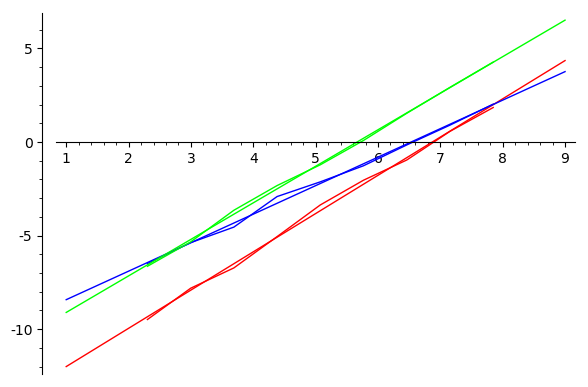

In [669]:
from scipy import stats
import time
n=len(Lnaiflog)
p1=line(Lnaiflog,rgbcolor=(1, 0, 0)) #on voit une tendance linéaire, la commande line(L) permettant de relier tous les points de L=[(x_0,y_0),(x_1,y_1),...]
p2=line(Lklog) #rgbcolor permet d'indiquer la couleur en niveaux de rouge, vert et bleu
p5=line(Lnaiflog2,rgbcolor=(0, 1, 0)) #on voit une tendance linéaire, la commande line(L) permettant de relier tous les points de L=[(x_0,y_0),(x_1,y_1),...]
slope1, intercept1, r_value1, p_value1, std_err1 =stats.linregress([Lnaiflog[i][0] for i in range(0,n)], [Lnaiflog[i][1] for i in range(0,n)])
#on effectue ici une régression linéaire sur la courbe rouge
p3=line([(i,slope1*i+intercept1) for i in range(1,n+1)],rgbcolor=(1, 0, 0))
slope2, intercept2, r_value2, p_value2, std_err2 =stats.linregress([Lklog[i][0] for i in range(0,n)], [Lklog[i][1] for i in range(0,n)])
#idem régression linéaire sur la courbe bleue
p4=line([(i,slope2*i+intercept2) for i in range(1,n+1)])
slope3, intercept3, r_value3, p_value3, std_err3 =stats.linregress([Lnaiflog2[i][0] for i in range(0,n)], [Lnaiflog2[i][1] for i in range(0,n)])
#idem régression linéaire sur la courbe bleue
p7=line([(i,slope3*i+intercept3) for i in range(1,n+1)],rgbcolor=(0, 1, 0))
print(r_value1,r_value2,r_value3)
print(slope1,slope2,slope3)
p1+p2+p3+p4+p5+p7

In [652]:
float(exp(slope2*log(10^6)+intercept2)) #temps estimé pour le produit de deux entiers de n=10^6 bits en s avec Karatsuba

66066.94930742061

In [654]:
float(exp(slope1*log(10^6)+intercept1)) #temps estimé pour le produit de deux entiers de n=10^6 bits en s avec la méthode naïve

1465957.6019784745

In [655]:
def produit2(P1,P2): #produit naïf en diviser pour régner
    L1=P1.copy()
    L2=P2.copy()
    L=[]
    r=0
    n1=len(L1)
    n2=len(L2)
    n=max(n1,n2)
    if n1<n:
        for i in range(n-n1):
            L1.append(0)
    if n2<n:
        for i in range(n-n2):
            L2.append(0)
    if n==1:
        return([L1[0]*L2[0]])
    k=n//2
    L1m=L1[:k]
    L2m=L2[:k]
    L1M=L1[k:]
    L2M=L2[k:]
    p1=produit2(L1m,L2m)
    p2=produit2(L1M,L2M)
    p3aux=produit2(L1m,L2M)
    p4aux=produit2(L1M,L2m)
    p=somme(p3aux,p4aux)
    res=somme(p1,decale(p,k))
    res=somme(res,decale(p2,2*k))
    return res

In [656]:
L1=[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
L2=[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
bintodec(karatsuba(L1,L2)),bintodec(L1)*bintodec(L2)

(448151855917359116767677693051593517975666,
 448151855917359116767677693051593517975666)

In [661]:
bintodec(karatsuba(L1,L2))

448151855917359116767677693051593517975666

In [660]:
bintodec(produit2(L1,L2))

448151855917359116767677693051593517975666

In [716]:
R.<x>=QQ[]
P=x+1
Q=x^2

In [722]:
def somme_poly(P1,P2): #somme pour des polynômes (sans retenue)
    L1=P1.copy()
    L2=P2.copy()
    L=[]
    n1=len(L1)
    n2=len(L2)
    n=max(n1,n2)
    if n1<n:
        for i in range(n-n1):
            L1.append(0)
    if n2<n:
        for i in range(n-n2):
            L2.append(0)
    for i in range(n):
        a=L1[i]+L2[i]
        L.append(a)
    return(L)

In [724]:
def decale_poly(L,i):
    P=L.copy()
    return [0 for j in range(i)]+P

In [725]:
def soustraction_poly(P1,P2): #uniquement si L1>=L2
    L1=P1.copy()
    L2=P2.copy()
    n1=len(L1)
    n2=len(L2)
    if n2<n1:
        for i in range(n1-n2):
            L2.append(0)
    if n1<n2:
        for i in range(n2-n1):
            L1.append(0)       
    L=[]
    for i in range(n1):
        a=L1[i]-L2[i]
        L.append(a)
    return(L)

In [730]:
def karatsuba2(P1,P2):
    L1=P1.copy()
    L2=P2.copy()
    L=[]
    n1=len(L1)
    n2=len(L2)
    n=max(n1,n2)
    if n1<n:
        for i in range(n-n1):
            L1.append(0)
    if n2<n:
        for i in range(n-n2):
            L2.append(0)
    if n==1:
        return([L1[0]*L2[0]])
    k=n//2
    L1m=L1[:k]
    L2m=L2[:k]
    L1M=L1[k:]
    L2M=L2[k:]
    p1=karatsuba2(L1m,L2m)
    p2=karatsuba2(L1M,L2M)
    p3aux=karatsuba2(somme_poly(L1m,L1M),somme_poly(L2m,L2M))
    p3aux2=soustraction_poly(p3aux,p1)
    p3=soustraction_poly(p3aux2,p2)
    p2d=decale_poly(p2,2*k)
    p3d=decale_poly(p3,k)
    res=somme_poly(p1,p2d)
    res=somme_poly(res,p3d)
    return res

In [731]:
def karatsuba_poly(P,Q):
    L1=list(P)
    L2=list(Q)
    L=karatsuba2(L1,L2)
    return(sum(L[i]*x^i for i in range(len(L))))

In [732]:
karatsuba_poly(P,Q)

x^3 + x^2

In [733]:
karatsuba_poly(2*x^9+3*x^7-5*x^6+2*x-1,-8*x^3-4*x^2-2*x-1),(2*x^9+3*x^7-5*x^6+2*x-1)*(-8*x^3-4*x^2-2*x-1)

(-16*x^12 - 8*x^11 - 28*x^10 + 26*x^9 + 14*x^8 + 7*x^7 + 5*x^6 - 16*x^4 + 1,
 -16*x^12 - 8*x^11 - 28*x^10 + 26*x^9 + 14*x^8 + 7*x^7 + 5*x^6 - 16*x^4 + 1)

In [696]:
tailles=[2^i*10 for i in range(0,19)]
Ladd=[]
for nb_chiffres in tailles:
    Ladd.append((nb_chiffres,mesure(somme,nb_chiffres)))

In [699]:
Laddlog=[(float(log(tailles[l])),log(Ladd[l][1])) for l in range(len(Ladd))]

0.9975183087932981
0.9889517153586741


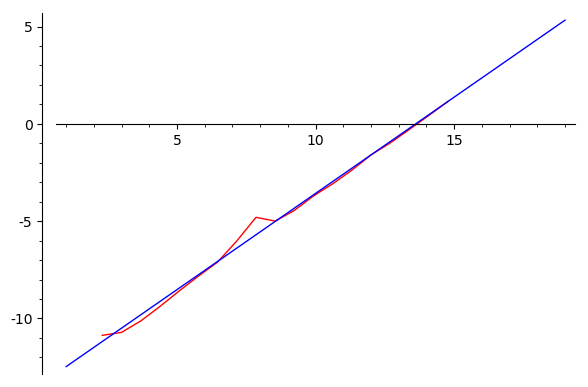

In [701]:
from scipy import stats
import time
n=len(Ladd)
p1=line(Laddlog,rgbcolor=(1, 0, 0)) #on voit une tendance linéaire, la commande line(L) permettant de relier tous les points de L=[(x_0,y_0),(x_1,y_1),...]
slope1, intercept1, r_value1, p_value1, std_err1 =stats.linregress([Laddlog[i][0] for i in range(0,n)], [Laddlog[i][1] for i in range(0,n)])
#on effectue ici une régression linéaire sur la courbe rouge
p3=line([(i,slope1*i+intercept1) for i in range(1,n+1)],rgbcolor=(0, 0, 1))
print(r_value1)
print(slope1)
p1+p3

# Bonus

In [746]:
def div_zi(z,t):
    qaux=z/t
    r=qaux.real()
    i=qaux.imag()
    a=floor(r)
    if (a-r>1/2):
        a=ceil(r)
    b=floor(i)
    if (b-i>1/2):
        b=ceil(i)
    quo=a+I*b
    return(quo,z-quo*t)

In [735]:
z=(1+I)/(3+2*I)

In [736]:
z.real()

5/13

In [738]:
z.imag()

1/13

In [739]:
z

1/13*I + 5/13

In [753]:
div_zi(2+4*I,3)

(I, I + 2)

In [754]:
abs(I+2),abs(3)

(sqrt(5), 3)

In [755]:
3*I+I+2

4*I + 2

In [758]:
def euclide_zi(a,b):
    while abs(b)!=0:
        r=div_zi(a,b)[1]
        a=b
        b=r
    return a

In [761]:
euclide_zi(1+2*I,5)

2*I + 1

In [773]:
def euclide_fraction_continue(a,b):
    L=[]
    while b!=0:
        r=a%b
        L.append(a//b)
        a=b
        b=r
    n=len(L)
    res=L[n-1]
    for i in range(1,n):
        res=L[n-i-1]+1/res
    return(res)

In [778]:
euclide_fraction_continue(18,8)

9/4

In [783]:
def resolution(a,b,c):
    d,u,v=euclide_etendu(a,b)
    if c%d!=0:
        return("Pas de solutions!")
    x=u*(c//d)
    y=v*(c//d)
    bprime=b//d
    aprime=a//d
    return("Les solutions sont de la forme (x="+str(x)+"-"+str(bprime)+"n,y="+str(y)+"+"+str(aprime)+"n) avec n entier")

In [779]:
a=2

In [782]:
str(a)+'+4'

'2+4'

In [786]:
resolution(9,12,485)

'Pas de solutions!'

In [787]:
resolution(9,12,483)

'Les solutions sont de la forme (x=-161-4n,y=161+3n) avec n entier'

In [788]:
n=var('n')
9*(-161-4*n)+12*(161+3*n)

483

In [799]:
def graph(a,b,c,N):
    d,u,v=euclide_etendu(a,b)
    if c%d!=0:
        return("Pas de solutions!")
    x=u*(c//d)
    y=v*(c//d)
    bprime=b//d
    aprime=a//d
    L=[]
    for i in range(-N,N):
        L.append((x-bprime*i,y+aprime*i))
    return L

In [800]:
L=graph(9,12,483,10)

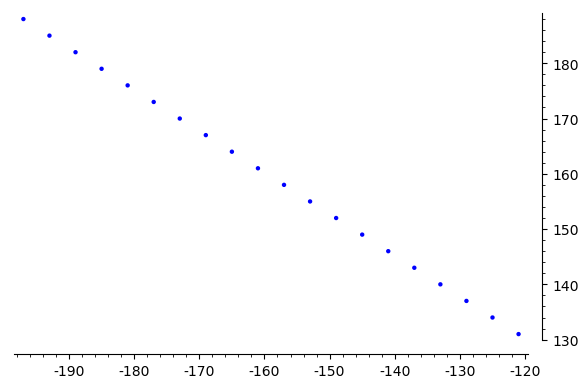

In [801]:
point(L)